In [1]:
import numpy as np
import pandas as pd

In [39]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# for tree visualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [3]:
X  = [[1,0,0],[0,1,0],[1,0,1],[0.5,0.5,0.5],[0.3,0,0],[0,0,0.2],[0.3,1,0.9],[0.2,0.7,0.8],
     [0.8,0.7,0.2]]
Y = [1,0,0,1,1,1,1,1,0]
clf  = tree.DecisionTreeClassifier(max_depth = 2)

In [4]:
clf_final = clf.fit(X,Y)
clf_final.score(X,Y)

0.7777777777777778

In [38]:
# plt.figure(figsize = (5,5))
# tree.plot_tree(clf_final)
# plt.show()

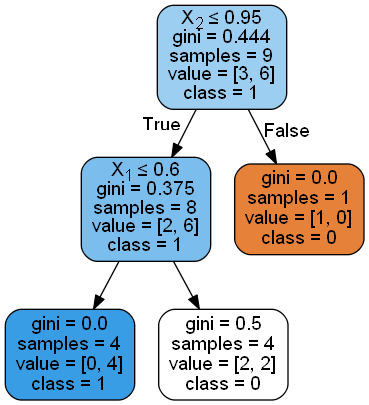

In [6]:
dot_data = StringIO()

export_graphviz(clf_final, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True, 
#                 feature_names = X_train.columns.values, 
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


# graph.write_png('UserActivity_2.png')

Image(graph.create_png())

In [7]:
# plt.figure(figsize = (5,5))
# tree.plot_tree(clf_final)
# plt.show()

In [8]:
Y_predict = clf_final.predict(X)
Y_predict

array([1, 0, 0, 1, 1, 1, 0, 0, 0])

In [9]:
print(classification_report(Y, Y_predict))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.67      0.80         6

   micro avg       0.78      0.78      0.78         9
   macro avg       0.80      0.83      0.77         9
weighted avg       0.87      0.78      0.78         9



In [10]:
print(accuracy_score(Y, Y_predict))

0.7777777777777778


In [11]:
print(precision_score(Y, Y_predict, pos_label = 0))

0.6


In [12]:
print(recall_score(Y, Y_predict, pos_label = 1))

0.6666666666666666


In [13]:
Y_predict_proba = clf_final.predict_proba(X)
print(Y_predict_proba[:,0])
fpr0, tpr0, threshold = roc_curve(Y, Y_predict_proba[:,0],pos_label = 0)
fpr1, tpr1, threshold = roc_curve(Y, Y_predict_proba[:,1],pos_label = 1)
print(auc(fpr0,tpr0))
print(auc(fpr1,tpr1))

[0.  0.5 1.  0.  0.  0.  0.5 0.5 0.5]
0.888888888888889
0.8888888888888888


In [14]:
fpr0

array([0.        , 0.        , 0.33333333, 1.        ])

In [15]:
tpr0

array([0.        , 0.33333333, 1.        , 1.        ])

In [16]:
(fpr0-0)**2+(tpr0 - 1)**2

array([1.        , 0.44444444, 0.11111111, 1.        ])

In [17]:
threshold

array([2. , 1. , 0.5, 0. ])

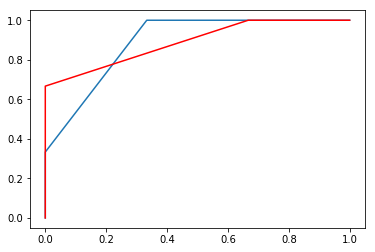

In [18]:
plt.plot(fpr0,tpr0)
plt.plot(fpr1,tpr1, color = 'red')
plt.show()

In [19]:
fpr0, tpr0, threshold = precision_recall_curve(Y, Y_predict_proba[:,0],pos_label = 0)
fpr1, tpr1, threshold = precision_recall_curve(Y, Y_predict_proba[:,1],pos_label = 1)
print(auc(tpr0,fpr0))
print(auc(tpr1,fpr1))

0.8666666666666667
0.9583333333333333


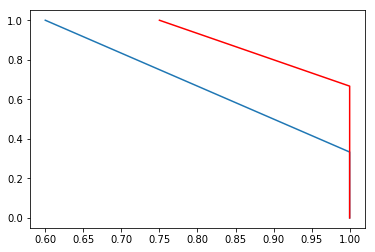

In [20]:
plt.plot(fpr0,tpr0)
plt.plot(fpr1,tpr1, color = 'red')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

In [22]:
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

In [23]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
mod = tree.DecisionTreeClassifier(max_depth = 2)
mod_fit = mod.fit(X,y)
mod_fit.score(X,y)

0.96

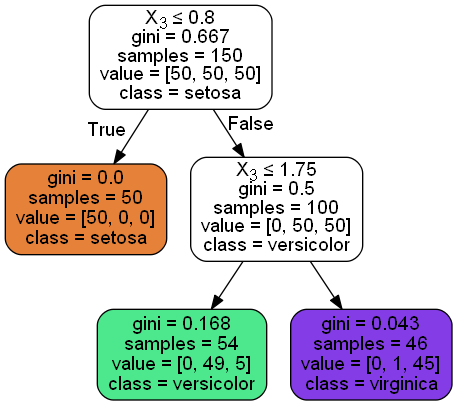

In [27]:
dot_data = StringIO()

export_graphviz(mod_fit, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True, 
#                 feature_names = feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'], 
                class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


# graph.write_png('UserActivity_2.png')

Image(graph.create_png())

In [26]:
# plt.figure(figsize = (13,13))
# tree.plot_tree(mod_fit, class_names = class_names,
#               feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width'])
# plt.show()

In [28]:
mod_fit.feature_importances_

array([0., 0., 0., 1.])

In [29]:
y_predict = mod_fit.predict(X)
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

   micro avg       0.96      0.96      0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
y_train.shape

(120,)

In [32]:
y_test.shape

(30,)

In [33]:
np.unique(y,return_counts = True)[1]/150*100

array([33.33333333, 33.33333333, 33.33333333])

In [34]:
np.unique(y_train,return_counts = True)[1]/120*100

array([35. , 32.5, 32.5])

In [35]:
np.unique(y_test,return_counts = True)[1]/30*100

array([26.66666667, 36.66666667, 36.66666667])

In [36]:
for j in np.arange(20)+2:
    mod = tree.DecisionTreeClassifier(max_depth = j)
    mod_fit = mod.fit(X_train,y_train)
    print("max_depth = ", j, "Score = ", mod_fit.score(X_test,y_test))

max_depth =  2 Score =  0.9333333333333333
max_depth =  3 Score =  0.9666666666666667
max_depth =  4 Score =  0.9666666666666667
max_depth =  5 Score =  0.9333333333333333
max_depth =  6 Score =  0.9666666666666667
max_depth =  7 Score =  0.9333333333333333
max_depth =  8 Score =  0.9666666666666667
max_depth =  9 Score =  0.9666666666666667
max_depth =  10 Score =  0.9666666666666667
max_depth =  11 Score =  0.9666666666666667
max_depth =  12 Score =  0.9666666666666667
max_depth =  13 Score =  0.9333333333333333
max_depth =  14 Score =  0.9333333333333333
max_depth =  15 Score =  0.9333333333333333
max_depth =  16 Score =  0.9333333333333333
max_depth =  17 Score =  0.9333333333333333
max_depth =  18 Score =  0.9333333333333333
max_depth =  19 Score =  0.9666666666666667
max_depth =  20 Score =  0.9333333333333333
max_depth =  21 Score =  0.9666666666666667


In [37]:
for j in np.arange(20)+2:
    mod = tree.DecisionTreeClassifier(max_depth = j)
    mod_cv = cross_val_score(mod, X, y, cv = 5)
    a = np.mean(mod_cv) - 2* np.std(mod_cv)
    b = np.mean(mod_cv) + 2* np.std(mod_cv)
    print("j->", j, "Confidence bounds ->", [a,b])

j-> 2 Confidence bounds -> [0.8390524291751269, 1.0276142374915396]
j-> 3 Confidence bounds -> [0.910111234843014, 1.009888765156986]
j-> 4 Confidence bounds -> [0.8936369923326446, 1.039696341000689]
j-> 5 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 6 Confidence bounds -> [0.8936369923326446, 1.039696341000689]
j-> 7 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 8 Confidence bounds -> [0.8853464064854296, 1.0213202601812372]
j-> 9 Confidence bounds -> [0.8936369923326446, 1.039696341000689]
j-> 10 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 11 Confidence bounds -> [0.8853464064854296, 1.0213202601812372]
j-> 12 Confidence bounds -> [0.8936369923326446, 1.039696341000689]
j-> 13 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 14 Confidence bounds -> [0.8853464064854296, 1.0213202601812372]
j-> 15 Confidence bounds -> [0.8946802735257822, 1.0253197264742182]
j-> 16 Confidence bounds -> [0.8853464064854296,